# Spotify Mood Classifier Testing

In [1]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SPOTIFY_CLIENT_ID = os.getenv('SPOTIFY_CLIENT_ID')
SPOTIFY_CLIENT_SECRET = os.getenv('SPOTIFY_CLIENT_SECRET')
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:

# Example: Fetch a song by its name and get its audio features
results = sp.search(q='mumei', type='track', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)

# Print out the audio features for the song
audio_features[0]

{'danceability': 0.66,
 'energy': 0.656,
 'key': 0,
 'loudness': -6.746,
 'mode': 1,
 'speechiness': 0.0281,
 'acousticness': 0.0365,
 'instrumentalness': 0.00011,
 'liveness': 0.39,
 'valence': 0.741,
 'tempo': 95.987,
 'type': 'audio_features',
 'id': '7tmkved6SCLlMJGXZhpMJ8',
 'uri': 'spotify:track:7tmkved6SCLlMJGXZhpMJ8',
 'track_href': 'https://api.spotify.com/v1/tracks/7tmkved6SCLlMJGXZhpMJ8',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7tmkved6SCLlMJGXZhpMJ8',
 'duration_ms': 252500,
 'time_signature': 4}

In [4]:
sad_playlist_id = '5irzXdNeeKc0Dg3UK4Ww6n'

# Get the tracks in the playlist
def get_playlist_tracks(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

sad_tracks = get_playlist_tracks(sad_playlist_id)



In [5]:
# Get array of song ids and names
sad_song_ids = []
sad_song_names = []

for track in sad_tracks:
    sad_song_ids.append(track['track']['id'])
    sad_song_names.append(track['track']['name'])

print(sad_song_ids[0:5])
print(sad_song_names[0:5])

['7vzSI6FJdJEu17dY2cng8V', '0Z5Uq56npgNJ6bJN2OOenB', '50x1Ic8CaXkYNvjmxe3WXy', '0otRX6Z89qKkHkQ9OqJpKt', '6uSjXs3d0yPb1Z4xtIvqin']
['Another Love', 'Say Yes To Heaven', 'Those Eyes', "Car's Outside", 'Someone You Loved']


In [6]:
# get audio features for all songs in the playlist
sad_audio_features = []
for i in range(0, len(sad_song_ids), 50):
    # get audio features for the next 50 songs
    audio_features = sp.audio_features(sad_song_ids[i:i+50])
    for feature in audio_features:
        sad_audio_features.append(feature)
sad_audio_features[0]

{'danceability': 0.63,
 'energy': 0.207,
 'key': 4,
 'loudness': -13.429,
 'mode': 0,
 'speechiness': 0.0334,
 'acousticness': 0.736,
 'instrumentalness': 2.34e-06,
 'liveness': 0.13,
 'valence': 0.331,
 'tempo': 123.968,
 'type': 'audio_features',
 'id': '7vzSI6FJdJEu17dY2cng8V',
 'uri': 'spotify:track:7vzSI6FJdJEu17dY2cng8V',
 'track_href': 'https://api.spotify.com/v1/tracks/7vzSI6FJdJEu17dY2cng8V',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7vzSI6FJdJEu17dY2cng8V',
 'duration_ms': 125755,
 'time_signature': 4}

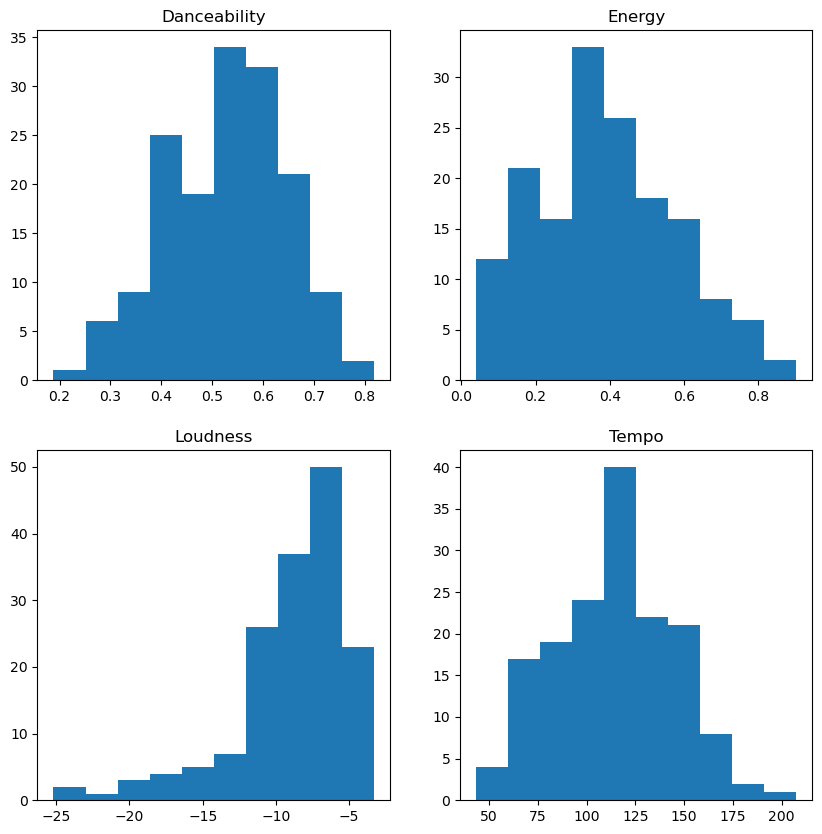

In [7]:
df_sad = pd.DataFrame(sad_audio_features)
# add song names to the dataframe at the beginning
df_sad.insert(0, 'song_name', sad_song_names)
df_sad.head()

# plot the audio features
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_sad['danceability'])
axs[0, 0].set_title('Danceability')
axs[0, 1].hist(df_sad['energy'])
axs[0, 1].set_title('Energy')
axs[1, 0].hist(df_sad['loudness'])
axs[1, 0].set_title('Loudness')
axs[1, 1].hist(df_sad['tempo'])
axs[1, 1].set_title('Tempo')
plt.show()


In [8]:
happy_playlist_id = '7INcD4lmarWTQiDVodjVt4'
happy_tracks = get_playlist_tracks(happy_playlist_id)

# get array of song names and audio features
happy_song_ids = []
happy_song_names = []

for track in happy_tracks:
    happy_song_ids.append(track['track']['id'])
    happy_song_names.append(track['track']['name'])
    
happy_audio_features = []
for i in range(0, len(happy_song_ids), 50):
    audio_features = sp.audio_features(happy_song_ids[i:i+50])
    for feature in audio_features:
        happy_audio_features.append(feature)

df_happy = pd.DataFrame(happy_audio_features)
df_happy.insert(0, 'song_name', happy_song_names)
df_happy.head()

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Here Comes The Sun - Remastered 2009,0.557,0.540,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,0.394,129.177,audio_features,6dGnYIeXmHdcikdzNNDMm2,spotify:track:6dGnYIeXmHdcikdzNNDMm2,https://api.spotify.com/v1/tracks/6dGnYIeXmHdc...,https://api.spotify.com/v1/audio-analysis/6dGn...,185733,4
1,Send Me On My Way,0.500,0.704,0,-8.797,1,0.0695,0.1250,0.000018,0.1380,0.722,119.463,audio_features,6XK6Zw6JkFsHXzAcMWNiIr,spotify:track:6XK6Zw6JkFsHXzAcMWNiIr,https://api.spotify.com/v1/tracks/6XK6Zw6JkFsH...,https://api.spotify.com/v1/audio-analysis/6XK6...,263360,4
2,"Signed, Sealed, Delivered (I'm Yours)",0.675,0.597,5,-11.329,1,0.0337,0.0534,0.000000,0.0986,0.828,108.875,audio_features,2eF8pWbiivYsYRpbntYsnc,spotify:track:2eF8pWbiivYsYRpbntYsnc,https://api.spotify.com/v1/tracks/2eF8pWbiivYs...,https://api.spotify.com/v1/audio-analysis/2eF8...,161160,4
3,Hooked On A Feeling,0.547,0.820,8,-6.728,1,0.0805,0.2610,0.000000,0.3000,0.933,118.208,audio_features,2Nz6aF1umHh5Et6I5H581L,spotify:track:2Nz6aF1umHh5Et6I5H581L,https://api.spotify.com/v1/tracks/2Nz6aF1umHh5...,https://api.spotify.com/v1/audio-analysis/2Nz6...,172867,4
4,I'm a Believer - 2006 Remaster,0.526,0.775,0,-6.050,1,0.0352,0.7070,0.000021,0.2170,0.962,80.106,audio_features,3G7tRC24Uh09Hmp1KZ7LQ2,spotify:track:3G7tRC24Uh09Hmp1KZ7LQ2,https://api.spotify.com/v1/tracks/3G7tRC24Uh09...,https://api.spotify.com/v1/audio-analysis/3G7t...,167373,4


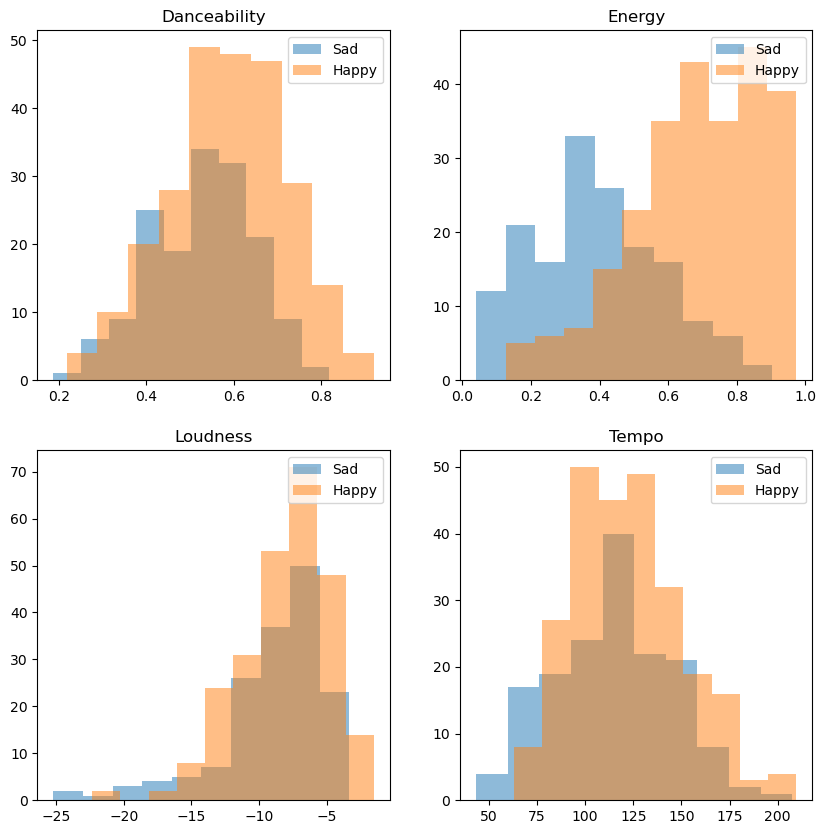

In [9]:
#compare the audio features of the two playlists
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_sad['danceability'], alpha=0.5, label='Sad')
axs[0, 0].hist(df_happy['danceability'], alpha=0.5, label='Happy')
axs[0, 0].set_title('Danceability')
axs[0, 0].legend(loc='upper right')
axs[0, 1].hist(df_sad['energy'], alpha=0.5, label='Sad')
axs[0, 1].hist(df_happy['energy'], alpha=0.5, label='Happy')
axs[0, 1].set_title('Energy')
axs[0, 1].legend(loc='upper right')
axs[1, 0].hist(df_sad['loudness'], alpha=0.5, label='Sad')
axs[1, 0].hist(df_happy['loudness'], alpha=0.5, label='Happy')
axs[1, 0].set_title('Loudness')
axs[1, 0].legend(loc='upper right')
axs[1, 1].hist(df_sad['tempo'], alpha=0.5, label='Sad')
axs[1, 1].hist(df_happy['tempo'], alpha=0.5, label='Happy')
axs[1, 1].set_title('Tempo')
axs[1, 1].legend(loc='upper right')
plt.show()



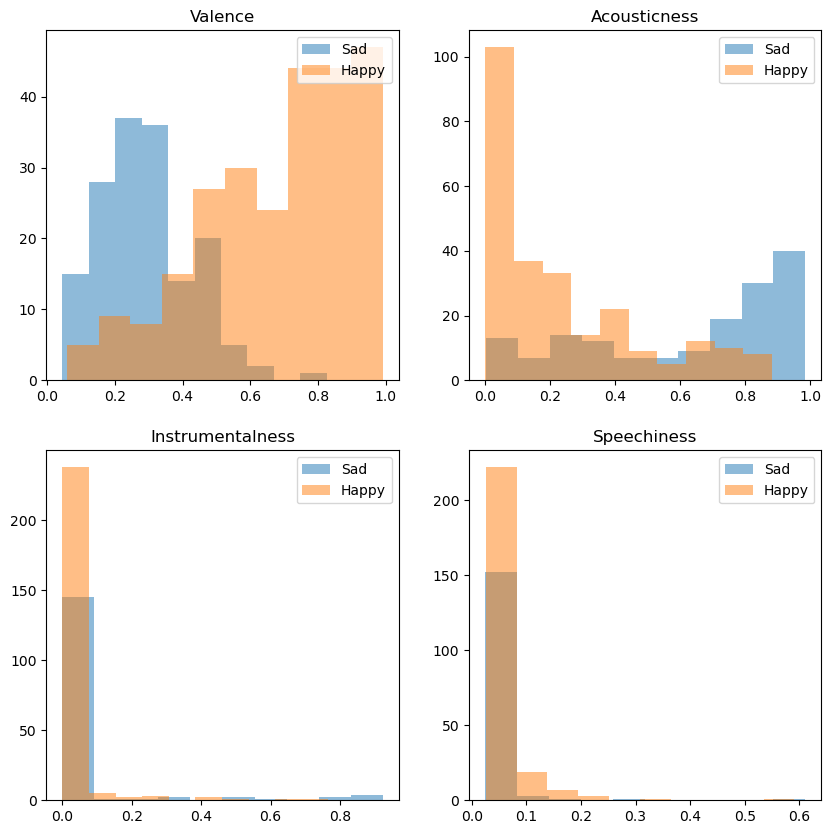

In [10]:
#compare other audio features
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_sad['valence'], alpha=0.5, label='Sad')
axs[0, 0].hist(df_happy['valence'], alpha=0.5, label='Happy')
axs[0, 0].set_title('Valence')
axs[0, 0].legend(loc='upper right')
axs[0, 1].hist(df_sad['acousticness'], alpha=0.5, label='Sad')
axs[0, 1].hist(df_happy['acousticness'], alpha=0.5, label='Happy')
axs[0, 1].set_title('Acousticness')
axs[0, 1].legend(loc='upper right')
axs[1, 0].hist(df_sad['instrumentalness'], alpha=0.5, label='Sad')
axs[1, 0].hist(df_happy['instrumentalness'], alpha=0.5, label='Happy')
axs[1, 0].set_title('Instrumentalness')
axs[1, 0].legend(loc='upper right')
axs[1, 1].hist(df_sad['speechiness'], alpha=0.5, label='Sad')
axs[1, 1].hist(df_happy['speechiness'], alpha=0.5, label='Happy')
axs[1, 1].set_title('Speechiness')
axs[1, 1].legend(loc='upper right')
plt.show()

In [11]:
calm_playlist_id = '0k0WKMaoZs46MFTYHwZku5'
# process the calm playlist
calm_tracks = get_playlist_tracks(calm_playlist_id)
calm_song_ids = []
calm_song_names = []
for track in calm_tracks:
    calm_song_ids.append(track['track']['id'])
    calm_song_names.append(track['track']['name'])

calm_audio_features = []
for i in range(0, len(calm_song_ids), 50):
    audio_features = sp.audio_features(calm_song_ids[i:i+50])
    for feature in audio_features:
        calm_audio_features.append(feature)

df_calm = pd.DataFrame(calm_audio_features)
df_calm.insert(0, 'song_name', calm_song_names)
df_calm.head()

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Heat Waves,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,238805,4
1,Someday,0.576,0.679,0,-7.237,1,0.0340,0.0311,0.000000,0.3230,0.213,121.005,audio_features,6aDsgHPZsMztSbZernzlF8,spotify:track:6aDsgHPZsMztSbZernzlF8,https://api.spotify.com/v1/tracks/6aDsgHPZsMzt...,https://api.spotify.com/v1/audio-analysis/6aDs...,187889,4
2,Sunflower - Spider-Man: Into the Spider-Verse,0.760,0.478,2,-5.574,1,0.0467,0.5520,0.000000,0.0703,0.913,89.908,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4
3,The Nights,0.527,0.835,6,-5.298,1,0.0433,0.0166,0.000000,0.2490,0.654,125.983,audio_features,0ct6r3EGTcMLPtrXHDvVjc,spotify:track:0ct6r3EGTcMLPtrXHDvVjc,https://api.spotify.com/v1/tracks/0ct6r3EGTcML...,https://api.spotify.com/v1/audio-analysis/0ct6...,176658,4
4,Locked out of Heaven,0.726,0.698,5,-4.165,1,0.0431,0.0490,0.000000,0.3090,0.867,143.994,audio_features,3w3y8KPTfNeOKPiqUTakBh,spotify:track:3w3y8KPTfNeOKPiqUTakBh,https://api.spotify.com/v1/tracks/3w3y8KPTfNeO...,https://api.spotify.com/v1/audio-analysis/3w3y...,233478,4


In [12]:
# engergetic playlist
energetic_playlist_id = '37i9dQZF1DX0vHZ8elq0UK'
# process the energetic playlist
energetic_tracks = get_playlist_tracks(energetic_playlist_id)
energetic_song_ids = []
energetic_song_names = []
for track in energetic_tracks:
    energetic_song_ids.append(track['track']['id'])
    energetic_song_names.append(track['track']['name'])

energetic_audio_features = []
for i in range(0, len(energetic_song_ids), 50):
    audio_features = sp.audio_features(energetic_song_ids[i:i+50])
    for feature in audio_features:
        energetic_audio_features.append(feature)
        
df_energetic = pd.DataFrame(energetic_audio_features)
df_energetic.insert(0, 'song_name', energetic_song_names)
df_energetic.head()

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Guess featuring Billie Eilish,0.776,0.667,7,-6.622,1,0.0983,0.01460,0.300000,0.0761,0.618,130.019,audio_features,3WOhcATHxK2SLNeP5W3v1v,spotify:track:3WOhcATHxK2SLNeP5W3v1v,https://api.spotify.com/v1/tracks/3WOhcATHxK2S...,https://api.spotify.com/v1/audio-analysis/3WOh...,145219,4
1,New Woman (feat. ROSALÍA),0.477,0.854,7,-4.715,1,0.2750,0.08580,0.000000,0.0650,0.314,140.515,audio_features,7ov3TDp5D00Rnu5R1viX4w,spotify:track:7ov3TDp5D00Rnu5R1viX4w,https://api.spotify.com/v1/tracks/7ov3TDp5D00R...,https://api.spotify.com/v1/audio-analysis/7ov3...,179790,5
2,Cruel Summer,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4
3,Austin (Boots Stop Workin'),0.756,0.672,0,-6.743,1,0.0522,0.46400,0.000003,0.1080,0.739,114.935,audio_features,2uqYupMHANxnwgeiXTZXzd,spotify:track:2uqYupMHANxnwgeiXTZXzd,https://api.spotify.com/v1/tracks/2uqYupMHANxn...,https://api.spotify.com/v1/audio-analysis/2uqY...,171783,4
4,Blinding Lights,0.513,0.730,1,-5.940,1,0.0598,0.00143,0.000095,0.0897,0.334,171.001,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4


In [13]:
# find the common songs for each pair of playlists
common_sad_happy = df_sad.merge(df_happy, on='song_name')
common_sad_calm = df_sad.merge(df_calm, on='song_name')
common_sad_energetic = df_sad.merge(df_energetic, on='song_name')
common_happy_calm = df_happy.merge(df_calm, on='song_name')
common_happy_energetic = df_happy.merge(df_energetic, on='song_name')
common_calm_energetic = df_calm.merge(df_energetic, on='song_name')

print('The name of the common songs in the sad and happy playlists are:')
print(common_sad_happy['song_name'])
print('The name of the common songs in the sad and calm playlists are:')
print(common_sad_calm['song_name'])
print('The name of the common songs in the sad and energetic playlists are:')
print(common_sad_energetic['song_name'])
print('The name of the common songs in the happy and calm playlists are:')
print(common_happy_calm['song_name'])
print('The name of the common songs in the happy and energetic playlists are:')
print(common_happy_energetic['song_name'])
print('The name of the common songs in the calm and energetic playlists are:')
print(common_calm_energetic['song_name'])

The name of the common songs in the sad and happy playlists are:
0    How to Save a Life
1            Let Her Go
2          Chasing Cars
Name: song_name, dtype: object
The name of the common songs in the sad and calm playlists are:
0            Another Love
1       Someone You Loved
2            Another Love
3        Story of My Life
4       Someone You Loved
5       Someone You Loved
6       Dancing On My Own
7       Someone You Loved
8               Breakeven
9    Set Fire to the Rain
Name: song_name, dtype: object
The name of the common songs in the sad and energetic playlists are:
Series([], Name: song_name, dtype: object)
The name of the common songs in the happy and calm playlists are:
0                      Daylight
1             Shut Up and Dance
2    Fireball (feat. John Ryan)
Name: song_name, dtype: object
The name of the common songs in the happy and energetic playlists are:
0    Fireball (feat. John Ryan)
Name: song_name, dtype: object
The name of the common songs in the ca

In [14]:
# remove the common songs from the playlists
df_sad = df_sad[~df_sad['song_name'].isin(common_sad_happy['song_name'])]
df_sad = df_sad[~df_sad['song_name'].isin(common_sad_calm['song_name'])]
df_sad = df_sad[~df_sad['song_name'].isin(common_sad_energetic['song_name'])]


In [15]:
# for happy-calm, remove the common songs from calm
df_calm = df_calm[~df_calm['song_name'].isin(common_sad_calm['song_name'])]

In [16]:
# for happy-energetic, remove the common songs from happy
df_happy = df_happy[~df_happy['song_name'].isin(common_happy_energetic['song_name'])]

In [17]:
# for calm-energetic, remove the common songs from calm
df_calm = df_calm[~df_calm['song_name'].isin(common_calm_energetic['song_name'])]

In [18]:
# check if the common songs are removed
common_sad_happy = df_sad.merge(df_happy, on='song_name')
common_sad_calm = df_sad.merge(df_calm, on='song_name')
common_sad_energetic = df_sad.merge(df_energetic, on='song_name')
common_happy_calm = df_happy.merge(df_calm, on='song_name')
common_happy_energetic = df_happy.merge(df_energetic, on='song_name')
common_calm_energetic = df_calm.merge(df_energetic, on='song_name')

print('The name of the common songs in the sad and happy playlists are:')
print(common_sad_happy['song_name'])
print('The name of the common songs in the sad and calm playlists are:')
print(common_sad_calm['song_name'])
print('The name of the common songs in the sad and energetic playlists are:')
print(common_sad_energetic['song_name'])
print('The name of the common songs in the happy and calm playlists are:')
print(common_happy_calm['song_name'])
print('The name of the common songs in the happy and energetic playlists are:')
print(common_happy_energetic['song_name'])
print('The name of the common songs in the calm and energetic playlists are:')
print(common_calm_energetic['song_name'])


The name of the common songs in the sad and happy playlists are:
Series([], Name: song_name, dtype: object)
The name of the common songs in the sad and calm playlists are:
Series([], Name: song_name, dtype: object)
The name of the common songs in the sad and energetic playlists are:
Series([], Name: song_name, dtype: object)
The name of the common songs in the happy and calm playlists are:
0             Daylight
1    Shut Up and Dance
Name: song_name, dtype: object
The name of the common songs in the happy and energetic playlists are:
Series([], Name: song_name, dtype: object)
The name of the common songs in the calm and energetic playlists are:
Series([], Name: song_name, dtype: object)


In [19]:
# manually remove 'Shut Up and Dance' and 'Daylight' from the calm playlist
df_calm = df_calm[~df_calm['song_name'].isin(['Shut Up and Dance', 'Daylight'])]



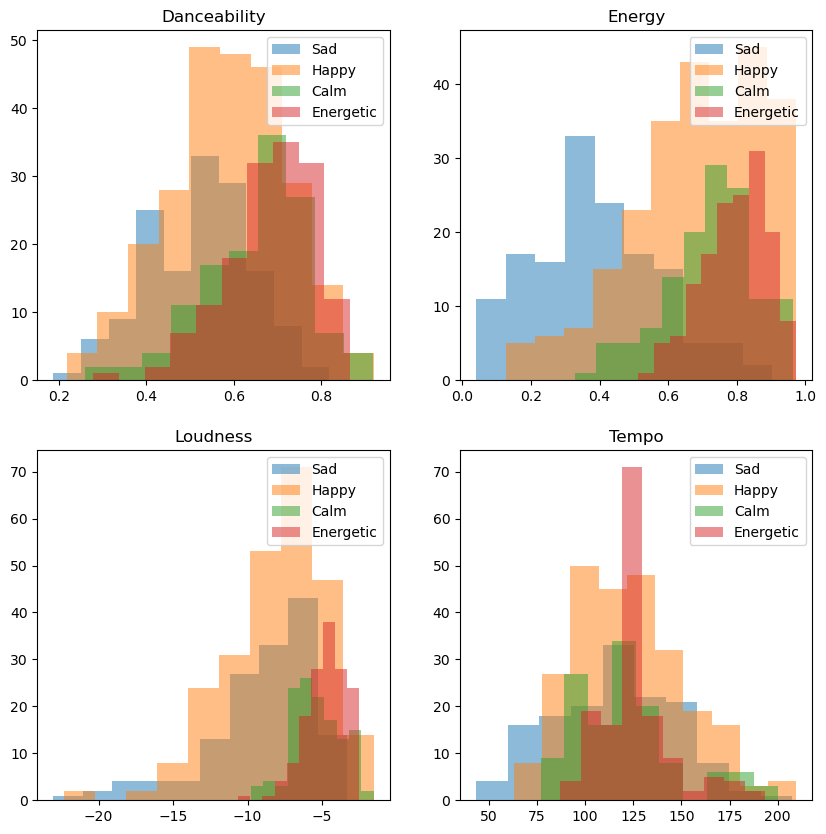

In [20]:
# plot the audio features of the playlists after removing the common songs
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_sad['danceability'], alpha=0.5, label='Sad')
axs[0, 0].hist(df_happy['danceability'], alpha=0.5, label='Happy')
axs[0, 0].hist(df_calm['danceability'], alpha=0.5, label='Calm')
axs[0, 0].hist(df_energetic['danceability'], alpha=0.5, label='Energetic')
axs[0, 0].set_title('Danceability')
axs[0, 0].legend(loc='upper right')
axs[0, 1].hist(df_sad['energy'], alpha=0.5, label='Sad')
axs[0, 1].hist(df_happy['energy'], alpha=0.5, label='Happy')
axs[0, 1].hist(df_calm['energy'], alpha=0.5, label='Calm')
axs[0, 1].hist(df_energetic['energy'], alpha=0.5, label='Energetic')
axs[0, 1].set_title('Energy')
axs[0, 1].legend(loc='upper right')
axs[1, 0].hist(df_sad['loudness'], alpha=0.5, label='Sad')
axs[1, 0].hist(df_happy['loudness'], alpha=0.5, label='Happy')
axs[1, 0].hist(df_calm['loudness'], alpha=0.5, label='Calm')
axs[1, 0].hist(df_energetic['loudness'], alpha=0.5, label='Energetic')
axs[1, 0].set_title('Loudness')
axs[1, 0].legend(loc='upper right')
axs[1, 1].hist(df_sad['tempo'], alpha=0.5, label='Sad')
axs[1, 1].hist(df_happy['tempo'], alpha=0.5, label='Happy')
axs[1, 1].hist(df_calm['tempo'], alpha=0.5, label='Calm')
axs[1, 1].hist(df_energetic['tempo'], alpha=0.5, label='Energetic')
axs[1, 1].set_title('Tempo')
axs[1, 1].legend(loc='upper right')
plt.show()


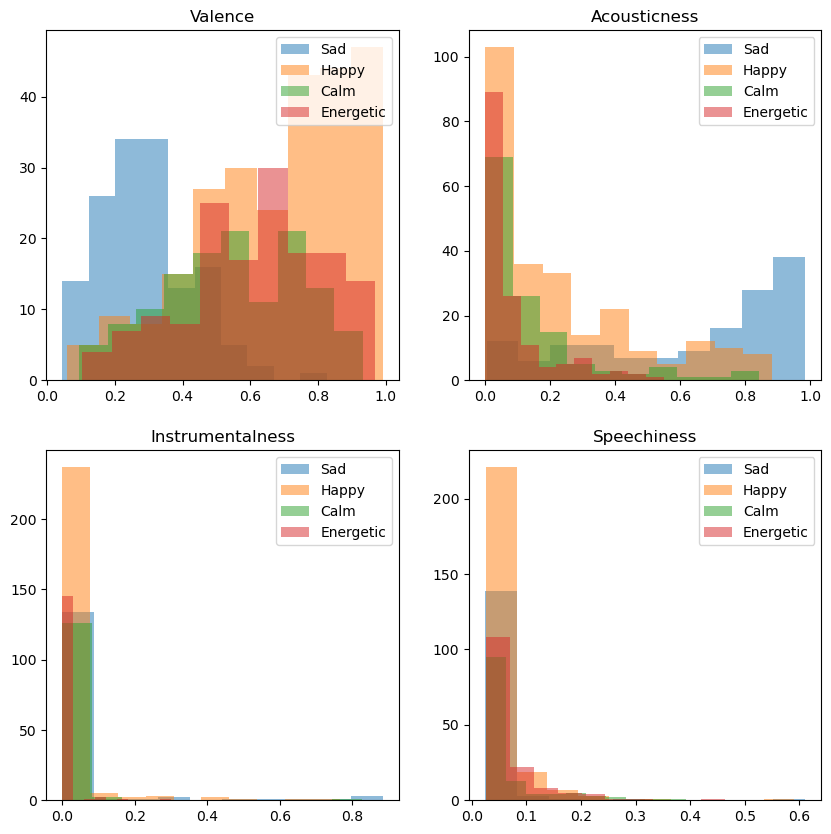

In [21]:
# plot the audio features of the playlists after removing the common songs
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_sad['valence'], alpha=0.5, label='Sad')
axs[0, 0].hist(df_happy['valence'], alpha=0.5, label='Happy')
axs[0, 0].hist(df_calm['valence'], alpha=0.5, label='Calm')
axs[0, 0].hist(df_energetic['valence'], alpha=0.5, label='Energetic')
axs[0, 0].set_title('Valence')
axs[0, 0].legend(loc='upper right')
axs[0, 1].hist(df_sad['acousticness'], alpha=0.5, label='Sad')
axs[0, 1].hist(df_happy['acousticness'], alpha=0.5, label='Happy')
axs[0, 1].hist(df_calm['acousticness'], alpha=0.5, label='Calm')
axs[0, 1].hist(df_energetic['acousticness'], alpha=0.5, label='Energetic')
axs[0, 1].set_title('Acousticness')
axs[0, 1].legend(loc='upper right')
axs[1, 0].hist(df_sad['instrumentalness'], alpha=0.5, label='Sad')
axs[1, 0].hist(df_happy['instrumentalness'], alpha=0.5, label='Happy')
axs[1, 0].hist(df_calm['instrumentalness'], alpha=0.5, label='Calm')
axs[1, 0].hist(df_energetic['instrumentalness'], alpha=0.5, label='Energetic')
axs[1, 0].set_title('Instrumentalness')
axs[1, 0].legend(loc='upper right')
axs[1, 1].hist(df_sad['speechiness'], alpha=0.5, label='Sad')
axs[1, 1].hist(df_happy['speechiness'], alpha=0.5, label='Happy')
axs[1, 1].hist(df_calm['speechiness'], alpha=0.5, label='Calm')
axs[1, 1].hist(df_energetic['speechiness'], alpha=0.5, label='Energetic')
axs[1, 1].set_title('Speechiness')
axs[1, 1].legend(loc='upper right')
plt.show()

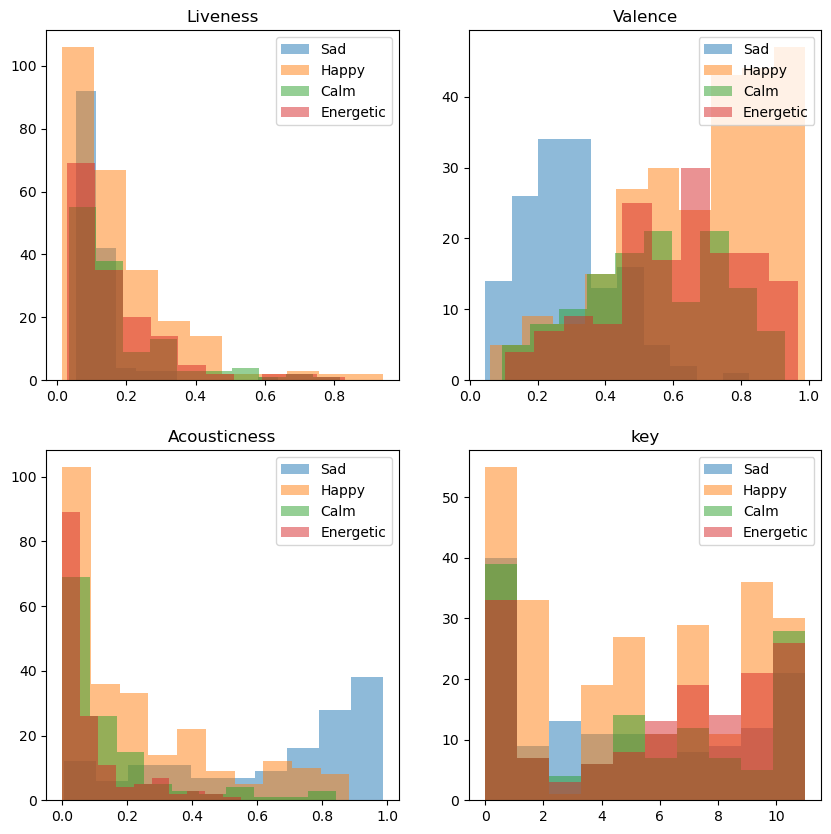

In [22]:
# compare the rest of the audio features
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_sad['liveness'], alpha=0.5, label='Sad')
axs[0, 0].hist(df_happy['liveness'], alpha=0.5, label='Happy')
axs[0, 0].hist(df_calm['liveness'], alpha=0.5, label='Calm')
axs[0, 0].hist(df_energetic['liveness'], alpha=0.5, label='Energetic')
axs[0, 0].set_title('Liveness')
axs[0, 0].legend(loc='upper right')
axs[0, 1].hist(df_sad['valence'], alpha=0.5, label='Sad')
axs[0, 1].hist(df_happy['valence'], alpha=0.5, label='Happy')
axs[0, 1].hist(df_calm['valence'], alpha=0.5, label='Calm')
axs[0, 1].hist(df_energetic['valence'], alpha=0.5, label='Energetic')
axs[0, 1].set_title('Valence')
axs[0, 1].legend(loc='upper right')
axs[1, 0].hist(df_sad['acousticness'], alpha=0.5, label='Sad')
axs[1, 0].hist(df_happy['acousticness'], alpha=0.5, label='Happy')
axs[1, 0].hist(df_calm['acousticness'], alpha=0.5, label='Calm')
axs[1, 0].hist(df_energetic['acousticness'], alpha=0.5, label='Energetic')
axs[1, 0].set_title('Acousticness')
axs[1, 0].legend(loc='upper right')
axs[1, 1].hist(df_sad['key'], alpha=0.5, label='Sad')
axs[1, 1].hist(df_happy['key'], alpha=0.5, label='Happy')
axs[1, 1].hist(df_calm['key'], alpha=0.5, label='Calm')
axs[1, 1].hist(df_energetic['key'], alpha=0.5, label='Energetic')
axs[1, 1].set_title('key')
axs[1, 1].legend(loc='upper right')
plt.show()


In [23]:
# features that should be considered for the model
# Danceability, Energy, Loudness, Tempo, Valence, Acousticness

# Merge all the playlists into one dataframe and add a column for the playlist name
df_sad['mood'] = 'Sad'
df_calm['mood'] = 'Calm'
df_happy['mood'] = 'Happy'
df_energetic['mood'] = 'Energetic'

df_all = pd.concat([df_sad, df_calm, df_happy, df_energetic])
#df_all = df_all[['song_name','danceability', 'energy', 'loudness', 'tempo', 'valence', 'acousticness', 'id', 'mood']]
df_all.head()


,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,mood
1,Say Yes To Heaven,0.517,0.310,6,-16.035,0,0.0263,0.766,0.010100,0.154,0.248,99.956,audio_features,0Z5Uq56npgNJ6bJN2OOenB,spotify:track:0Z5Uq56npgNJ6bJN2OOenB,https://api.spotify.com/v1/tracks/0Z5Uq56npgNJ...,https://api.spotify.com/v1/audio-analysis/0Z5U...,211200,4,Sad
2,Those Eyes,0.594,0.348,4,-8.297,1,0.0285,0.709,0.000021,0.317,0.248,120.048,audio_features,50x1Ic8CaXkYNvjmxe3WXy,spotify:track:50x1Ic8CaXkYNvjmxe3WXy,https://api.spotify.com/v1/tracks/50x1Ic8CaXkY...,https://api.spotify.com/v1/audio-analysis/50x1...,220750,3,Sad
3,Car's Outside,0.338,0.562,9,-7.181,1,0.0290,0.039,0.000000,0.107,0.259,149.907,audio_features,0otRX6Z89qKkHkQ9OqJpKt,spotify:track:0otRX6Z89qKkHkQ9OqJpKt,https://api.spotify.com/v1/tracks/0otRX6Z89qKk...,https://api.spotify.com/v1/audio-analysis/0otR...,248373,4,Sad
5,When I Was Your Man,0.612,0.280,0,-8.648,1,0.0434,0.932,0.000000,0.088,0.387,72.795,audio_features,0nJW01T7XtvILxQgC5J7Wh,spotify:track:0nJW01T7XtvILxQgC5J7Wh,https://api.spotify.com/v1/tracks/0nJW01T7XtvI...,https://api.spotify.com/v1/audio-analysis/0nJW...,213827,4,Sad
6,Be Free,0.405,0.146,3,-15.581,1,0.0331,0.939,0.000158,0.113,0.232,117.698,audio_features,58CcxySByjheGAh5BvphS3,spotify:track:58CcxySByjheGAh5BvphS3,https://api.spotify.com/v1/tracks/58CcxySByjhe...,https://api.spotify.com/v1/audio-analysis/58Cc...,146113,4,Sad


In [24]:
# create a model to predict the mood of a song based on its audio features
# use the KNN model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_all[['danceability', 'energy', 'loudness', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'speechiness']]
y = df_all['mood']

# Use a pipeline to scale the features and perform k fold cross validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [25]:
# create a pipeline using SVM
pipe = make_pipeline(StandardScaler(), SVC())
scores = cross_val_score(pipe, X, y, cv=10)
print('The accuracy of the SVM model is:', np.mean(scores))
print('The mean accuracy of the SVM model is:', np.mean(scores))
print('The standard deviation of the accuracy of the SVM model is:', np.std(scores))
print('The R^2 score of the SVM model is:', np.mean(scores))


The accuracy of the SVM model is: 0.6583187006145741
The mean accuracy of the SVM model is: 0.6583187006145741
The standard deviation of the accuracy of the SVM model is: 0.0559202940346919
The R^2 score of the SVM model is: 0.6583187006145741


In [26]:
# optimize the SVM model
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000], 'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X, y)
print('The best parameters for the SVM model are:', grid.best_params_)
print('The best score for the SVM model is:', grid.best_score_)
print('The best estimator for the SVM model is:', grid.best_estimator_)
print('The best index for the SVM model is:', grid.best_index_)
print('The best score for the SVM model is:', grid.best_score_)



The best parameters for the SVM model are: {'svc__C': 100, 'svc__gamma': 0.01}
The best score for the SVM model is: 0.686369622475856
The best estimator for the SVM model is: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.01))])
The best index for the SVM model is: 17
The best score for the SVM model is: 0.686369622475856


In [27]:
# try the KNN model
pipe1 = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores1 = cross_val_score(pipe1, X, y, cv=10)
print('The accuracy of the KNN model is:', np.mean(scores1))
print('The mean accuracy of the KNN model is:', np.mean(scores1))
print('The standard deviation of the accuracy of the KNN model is:', np.std(scores1))


The accuracy of the KNN model is: 0.5992537313432835
The mean accuracy of the KNN model is: 0.5992537313432835
The standard deviation of the accuracy of the KNN model is: 0.08029486391944747


In [28]:
# optimize the KNN model
param_grid1 = {'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid1 = GridSearchCV(pipe1, param_grid1, cv=10)
grid1.fit(X, y)
print('The best parameters for the KNN model are:', grid1.best_params_)
print('The best score for the KNN model is:', grid1.best_score_)
print('The best estimator for the KNN model is:', grid1.best_estimator_)


The best parameters for the KNN model are: {'kneighborsclassifier__n_neighbors': 7}
The best score for the KNN model is: 0.6347892888498683
The best estimator for the KNN model is: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])


In [29]:
# we use the SVM model since it has a higher accuracy
# make the model using train test split and use the optimal parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
pipe = make_pipeline(StandardScaler(), SVC(C=100, gamma=0.01))

pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print('The accuracy of the model is:', accuracy_score(y_test, y_hat))

The accuracy of the model is: 0.6838235294117647


In [59]:
# predict the mood of a song
# get the audio features of a song
test_song = 'payphone'
results = sp.search(q=test_song, type='track', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)
audio_features = audio_features[0]
X_new = pd.DataFrame(audio_features, index=[0])
X_new = X_new[['danceability', 'energy', 'loudness', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'speechiness']]
mood = pipe.predict(X_new)
print('The mood of the song', test_song,'by', results['tracks']['items'][0]['artists'][0]['name'], 'is:', mood[0])

The mood of the song payphone by Maroon 5 is: Energetic
